### CRISP-DM Intro
The data explored in the notebook is from [Stackoverflow’s 2020 Annual Developer Survey](https://insights.stackoverflow.com/survey). The CRISP-DM is known as the Cross Industry Standard Prcoess for data mining will be used to explore the data.

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

### 1. Business Understanding
I used [data](https://drive.google.com/file/d/1dfGerWeWkcyQ9GX9x20rdSGj7WtEpzBB/view) to take a closer look at three questions.

 - What is the percentage of women as a developer by profession?
 - What factors benefit you choose software development as a career?
 - What are the downsides to a developer's career?

 
### 2. Data Understanding


In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./data/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [2]:
df2 = pd.read_csv('./data/survey_results_schema.csv')
df2.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


In [3]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print('There are {} rows and {} cols in the dataset.'.format(num_rows, num_cols))

There are 64461 rows and 61 cols in the dataset.


### 3. Prepare Data

I am a developer by profession                                                   0.732117
I am a student who is learning to code                                           0.123641
I am not primarily a developer, but I write code sometimes as part of my work    0.085354
I code primarily as a hobby                                                      0.035898
I used to be a developer by profession, but no longer am                         0.018352
Name: MainBranch, dtype: float64


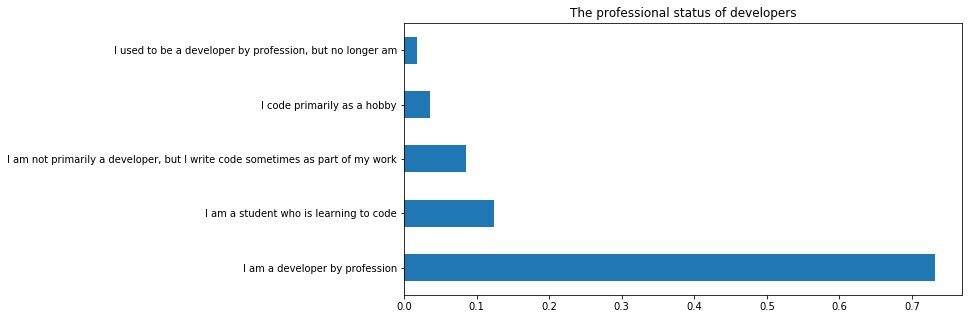

In [4]:
status_vals = df.MainBranch.value_counts()
print(status_vals/df.shape[0])
plt.title('The professional status of developers')
(status_vals/df.shape[0]).plot.barh(stacked=True,  figsize=(10,5));

In [5]:
developer_df = df[df.MainBranch == 'I am a developer by profession']

print('There were a total of {} participants, of whom {} were developers by profession.'\
      .format(df.shape[0], developer_df.shape[0]))

There were a total of 64461 participants, of whom 47193 were developers by profession.


In [6]:
list(df2[df2.Column == 'ConvertedComp']['QuestionText'])[0]

'Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.'

### 4 Data Modeling 
#### Question 1 : What is the percentage of women as a developer by profession?

Man                                                            0.914689
Woman                                                          0.072861
Non-binary, genderqueer, or gender non-conforming              0.006943
Man;Non-binary, genderqueer, or gender non-conforming          0.002288
Woman;Non-binary, genderqueer, or gender non-conforming        0.001569
Woman;Man                                                      0.001144
Woman;Man;Non-binary, genderqueer, or gender non-conforming    0.000505
Name: Gender, dtype: float64
There are 7.29 percent of female developers


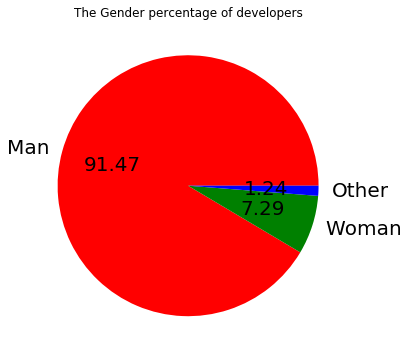

In [7]:
pc_gender = developer_df['Gender'].value_counts()/(developer_df.shape[0] - sum(developer_df['Gender'].isnull()))
print(pc_gender)
print('There are {:.2f} percent of female developers'.format(pc_gender.Woman*100))
plt.title('The Gender percentage of developers');
pd.Series([pc_gender.Man, pc_gender.Woman,(1-pc_gender.Man-pc_gender.Woman)], name='').plot.pie(labels=['Man', 'Woman', 'Other'], colors=['r', 'g', 'b'],
                autopct='%.2f', fontsize=20, figsize=(6, 6));


In [8]:
developer_df.WorkWeekHrs.mean()

40.67249528891347

In [9]:
developer_df.NEWLearn.value_counts()/(developer_df.shape[0] - sum(developer_df['NEWLearn'].isnull()))

Once a year             0.381244
Every few months        0.360893
Once every few years    0.239818
Once a decade           0.018045
Name: NEWLearn, dtype: float64

#### Question 2 : What does the career of a developer relate?

In [10]:
print('Average annual salary for developers is {:.2f}'.format(developer_df.ConvertedComp.mean()))

Average annual salary for developers is 102683.11


In [11]:
sur_series = (developer_df['Country'].value_counts()/(developer_df.shape[0] - sum(developer_df['Country'].isnull())))[:10]
print('The top 10 countries:\n {}'.format(sur_series))

The top 10 countries:
 United States     0.201157
India             0.129340
United Kingdom    0.064244
Germany           0.061202
Canada            0.034717
Brazil            0.030144
France            0.030037
Netherlands       0.021337
Poland            0.020635
Spain             0.019614
Name: Country, dtype: float64


United States     208406.016432
United Kingdom    139932.843373
Canada            113580.194309
Germany            92097.020574
Netherlands        79835.875339
France             75682.666345
Spain              73518.923188
Poland             42662.584118
India              27671.505752
Brazil             24003.130850
Name: ConvertedComp, dtype: float64


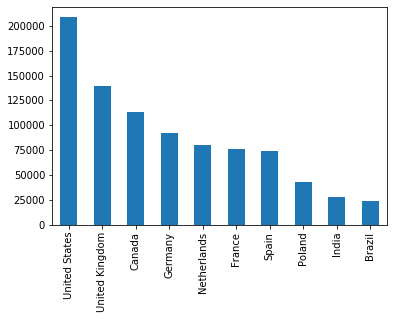

In [12]:
sal_df = developer_df.groupby('Country').mean()['ConvertedComp'].dropna().sort_values(ascending=False)
print(sal_df[sur_series.keys()].sort_values(ascending=False))
sal_df[sur_series.keys()].sort_values(ascending=False).plot.bar();

In [13]:
developer_df.groupby('OrgSize').describe()['ConvertedComp']

,count,mean,std,min,25%,50%,75%,max
OrgSize,,,,,,,,
"1,000 to 4,999 employees",3379.0,126773.333235,261965.496839,0.0,35928.0,67000.0,111075.0,2000000.0
10 to 19 employees,2963.0,73728.921363,172232.414046,0.0,13746.0,37834.0,70000.0,2000000.0
"10,000 or more employees",4234.0,143866.755786,276651.150618,0.0,40915.0,77832.0,134575.5,2000000.0
100 to 499 employees,6059.0,101881.174451,219512.085740,0.0,27612.0,56040.0,94138.5,2000000.0
2 to 9 employees,3027.0,70933.740007,171611.555837,0.0,12643.0,35028.0,66810.0,2000000.0
20 to 99 employees,7049.0,93927.025819,216239.126605,0.0,21620.0,48644.0,81720.0,2000000.0
"5,000 to 9,999 employees",1203.0,119037.573566,232400.073764,0.0,35590.0,70000.0,110000.0,2000000.0
500 to 999 employees,2073.0,98007.010613,208178.723004,0.0,26946.0,54480.0,92000.0,2000000.0
"Just me - I am a freelancer, sole proprietor, etc.",1131.0,82739.342175,125204.848730,0.0,14238.0,51704.0,108099.0,1000000.0


In [14]:
developer_df.groupby('OrgSize').describe()['WorkWeekHrs'].sort_values(by='mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
OrgSize,,,,,,,,
"10,000 or more employees",4865.0,41.144769,17.211422,2.0,40.0,40.0,43.0,475.0
100 to 499 employees,7017.0,41.018293,19.866677,3.0,40.0,40.0,42.0,425.0
"5,000 to 9,999 employees",1418.0,40.720107,18.463251,1.0,40.0,40.0,41.0,425.0
"1,000 to 4,999 employees",3897.0,40.674391,18.152674,3.0,40.0,40.0,40.0,425.0
10 to 19 employees,3496.0,40.572912,18.992978,2.0,38.0,40.0,45.0,385.0
20 to 99 employees,8204.0,40.532460,16.036356,1.5,40.0,40.0,42.0,425.0
2 to 9 employees,3686.0,40.451953,17.848995,2.0,36.0,40.0,45.0,385.0
500 to 999 employees,2389.0,40.239879,14.275007,4.0,40.0,40.0,42.0,385.0
"Just me - I am a freelancer, sole proprietor, etc.",1580.0,39.993861,20.823595,1.0,30.0,40.0,50.0,375.0


In [15]:
possible_vals = set(np.concatenate(df.NEWJobHunt.dropna().str.split(';').to_numpy()).ravel().tolist())
print(possible_vals)

{'Wanting to share accomplishments with a wider network', 'Trouble with leadership at my company', 'Better compensation', 'Curious about other opportunities', 'Growth or leadership opportunities', 'Just because', 'Wanting to work with new technologies', 'Trouble with my teammates', 'Looking to relocate', 'Better work/life balance', 'Trouble with my direct manager', 'Having a bad day (or week or month) at work'}


In [16]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

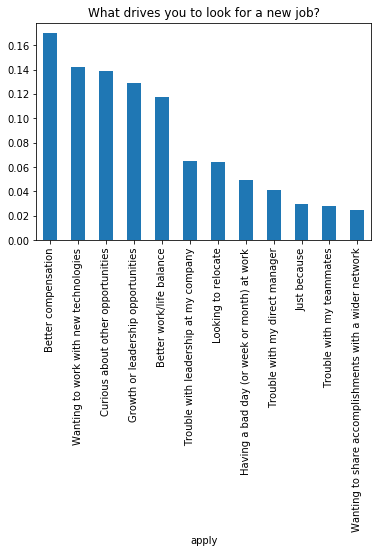

,count
apply,
Better compensation,0.170001
Wanting to work with new technologies,0.142220
Curious about other opportunities,0.138870
Growth or leadership opportunities,0.128663
Better work/life balance,0.117284
Trouble with leadership at my company,0.065119
Looking to relocate,0.063883
Having a bad day (or week or month) at work,0.049303
Trouble with my direct manager,0.041332


In [17]:
def clean_and_plot(df, title='What drives you to look for a new job?', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    jobhunt = df['NEWJobHunt'].value_counts().reset_index()
    jobhunt.rename(columns={'index': 'apply', 'NEWJobHunt': 'count'}, inplace=True)
    jobhunt_df = total_count(jobhunt, 'apply', 'count', possible_vals)

    jobhunt_df.set_index('apply', inplace=True)
    if plot:
        (jobhunt_df/jobhunt_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_jobhunt_df = jobhunt_df/jobhunt_df.sum()
    return props_jobhunt_df
    
props_df = clean_and_plot(df)
props_df

#### Question 3 : What are the downsides to a developer's career?

In [37]:
developer_df.groupby('Employment').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
Employment,,,,,,,,
Employed full-time,28652.0,31.591226,8.178326,1.0,26.0,30.0,35.00,279.0
Employed part-time,1017.0,27.467060,8.513257,15.0,22.0,25.0,31.00,72.0
"Independent contractor, freelancer, or self-employed",3275.0,35.598168,10.861110,13.0,28.0,34.0,41.00,99.0
"Not employed, and not looking for work",42.0,35.642857,11.913963,18.0,27.0,33.5,44.75,64.0
"Not employed, but looking for work",671.0,30.324143,9.441631,15.0,24.0,27.0,34.00,73.0
Retired,33.0,64.848485,9.175787,46.0,60.0,65.0,69.00,83.0
Student,607.0,22.630478,3.958720,10.0,20.0,22.0,24.00,69.0


In the Independent contractor, freelancer, or self-employed, Not employed, and Not looking for work, the average age is 35.64. The average age in Employed full-time is 31.59, meaning the prime age for engineers is between 31 to 32 years old.

In [38]:
developer_df.groupby('JobSeek').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
JobSeek,,,,,,,,
I am actively looking for a job,4937.0,30.330464,8.016843,1.0,25.0,28.0,34.0,99.0
I am not interested in new job opportunities,9366.0,32.712471,9.158667,1.0,26.0,31.0,37.0,99.0
"I’m not actively looking, but I am open to new opportunities",19970.0,31.500075,8.508524,1.0,25.0,30.0,36.0,279.0


Younger engineers are more motivated to find work

In [20]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
df = pd.read_csv('./data/survey_results_public.csv')

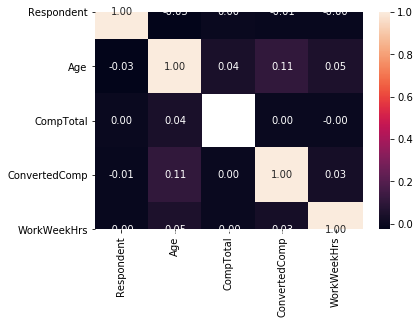

In [22]:
sns.heatmap(df.corr(), annot=True, fmt='.2f');

In [23]:
num_vars = df[['Age','WorkWeekHrs','ConvertedComp']]
prop_sals = 1- num_vars['ConvertedComp'].isnull().mean()
prop_sals

0.5391787282232667

In [24]:
drop_sal_df = num_vars.dropna(subset=['ConvertedComp'], axis=0)
drop_sal_df.shape

(34756, 3)

I was only looking at the correlation between age and annual salary, so drop the ['ConvertedComp'] NA value.

In [25]:
df_drop = drop_sal_df.dropna(axis=0)
df_drop.shape

(30083, 3)

When I drop all NA value , there are enough data for me to see if age relate to annual salary.

In [26]:
X = df_drop[['Age','WorkWeekHrs']]
y = df_drop['ConvertedComp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True)

In [27]:
lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [33]:
#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [29]:
length_y_train= len(y_train_preds)
length_y_test = len(y_test_preds)

In [30]:
"The r-squared score for your model was {} on {} values.".format(train_score, length_y_train)

'The r-squared score for your model was 0.012196807744460081 on 21058 values.'

In [31]:
"The r-squared score for your model was {} on {} values.".format(test_score, length_y_test)

'The r-squared score for your model was 0.01272694765878779 on 9025 values.'

In [32]:
# look at the weight of their coefficients
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df

,est_int,coefs,abs_coefs
0,Age,2735.027903,2735.027903
1,WorkWeekHrs,375.992548,375.992548


The age of the developer has an impact on the annual salary.

### 5.Evaluate the Results

[The medium stroy](https://medium.com/@tomgtbst/would-you-advise-your-daughter-to-be-a-software-engineer-d7ca9e53370a)